### IHDP Benchmark: Comparing CMGP Variants (100 Replications)

This experiment evaluates four versions of CMGP on the standard IHDP benchmark dataset across all 100 simulated replications. The goal is to assess the real-world effectiveness of the proposed enhancements under standard benchmarking conditions.

**Compared Configurations:**
- **Baseline**: Standard CMGP with no enhancements.
- **Overlap-Aware**: Applies hybrid kernel scaling to address poor overlap.
- **Variance-ARD**: Regularizes ARD lengthscales via ridge regression on treatment propensity.
- **Combined**: Uses both enhancements simultaneously.

The bar plot below summarizes the average √PEHE and corresponding 95% confidence intervals for each configuration. These results correspond to Figure 6 in Section 4.2 of the paper and demonstrate the benefits of each enhancement in improving treatment effect estimation accuracy.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

from src.evaluate import evaluate_dataset
from src.cmgp.utils.metrics import mean_confidence_interval

def evaluate_ihdp_configs(max_iterations=100):
    """
    Evaluates CMGP variants on the full IHDP benchmark (100 replications).
    For each of the following configurations:
        - Baseline: No enhancements
        - Overlap-Aware: Uses overlap-aware kernel scaling
        - Variance-ARD: Uses ridge-T regularized ARD
        - Combined: Both enhancements applied

    Computes mean and 95% CI for √PEHE, then visualizes the result.
    """
    results = []

    # Evaluate each configuration across 100 replications
    for exp_idx in tqdm(range(1, 101)):
        for config_name, kwargs in [
            ("Baseline", dict()),
            ("Overlap-Aware-ARD", dict(overlap_scaling=True)),
            ("Variance-ARD", dict(variance_ard=True)),
            ("Combined", dict(overlap_scaling=True, variance_ard=True)),
        ]:
            result = evaluate_dataset(
                "ihdp",
                data_path=Path("src/data"),
                exp_idx=exp_idx,
                max_gp_iterations=max_iterations,
                **kwargs
            )
            result["Config"] = config_name
            result["Exp"] = exp_idx
            results.append(result)

    # Convert to DataFrame
    df = pd.DataFrame(results)

    # Compute mean and 95% CI of √PEHE for each configuration
    summary = df.groupby("Config")["√PEHE"].agg([
        ("Mean PEHE", lambda x: round(np.mean(x), 4)),
        ("CI Width", lambda x: round(mean_confidence_interval(x)[1], 4))
    ]).reset_index()

    # Extract baseline stats
    baseline_row = summary[summary["Config"] == "Baseline"]
    baseline_mean = baseline_row["Mean PEHE"].values[0]
    baseline_ci = baseline_row["CI Width"].values[0]

    # Clean config labels for x-axis
    label_map = {
        "Baseline": "baseline",
        "Combined": "combined",
        "Overlap-Aware-ARD": "overlap",
        "Variance-ARD": "variance_ard"
    }
    summary["Label"] = summary["Config"].map(label_map)

    # Create dot plot with error bars and horizontal lines
    plt.figure(figsize=(10, 6))
    plt.errorbar(
        summary["Label"],
        summary["Mean PEHE"],
        yerr=summary["CI Width"],
        fmt='o',
        color='orange',
        ecolor='orange',
        elinewidth=2,
        capsize=5
    )
    plt.axhline(baseline_mean, linestyle='--', color='blue', label='Baseline Mean')
    plt.axhline(baseline_mean + baseline_ci, linestyle=':', color='blue', label='Baseline 95% CI')
    plt.axhline(baseline_mean - baseline_ci, linestyle=':', color='blue')

    plt.ylabel(r'$\sqrt{\mathrm{PEHE}}$')
    plt.title(r'$\sqrt{\mathrm{PEHE}}$ Mean and 95\% Confidence Interval by Enhancement')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.ylim(min(summary["Mean PEHE"] - summary["CI Width"]) - 0.01, max(summary["Mean PEHE"] + summary["CI Width"]) + 0.01)
    plt.legend()
    plt.tight_layout()
    plt.show()


  0%|          | 0/100 [00:00<?, ?it/s]

[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [1.05 1.28 1.29 1.29 1.3  1.34 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.95 0.72 0.71 0.71 0.7  0.66 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [1.05 1.28 1.29 1.29 1.3  1.34 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.95 0.72 0.71 0.71 0.7  0.66 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.303 0.304 0.301 0.301 0.3   1.301 1.301 1.301 1.301]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [1.05 1.28 1.29 1.29 1.3  1.34 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.95 0.72 0.71 0.71 0.7  0.66 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctr

  1%|          | 1/100 [03:15<5:23:00, 195.76s/it]

[Hybrid Scaling] scalar ctrl=1.265, scalar treat=0.735
First 10 per-feature ctrl ratios (debug): [0.96 1.26 1.28 1.28 1.29 1.31 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.04 0.74 0.72 0.72 0.71 0.69 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.265, scalar treat=0.735
First 10 per-feature ctrl ratios (debug): [0.96 1.26 1.28 1.28 1.29 1.31 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.04 0.74 0.72 0.72 0.71 0.69 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.301 0.309 0.301 0.301 1.22  1.22  1.22  1.22 ]
[Hybrid Scaling] scalar ctrl=1.265, scalar treat=0.735
First 10 per-feature ctrl ratios (debug): [0.96 1.26 1.28 1.28 1.29 1.31 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.04 0.74 0.72 0.72 0.71 0.69 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.265, scalar treat=0.735
First 10 per-feature ctr

  2%|▏         | 2/100 [06:51<5:39:19, 207.75s/it]

[Hybrid Scaling] scalar ctrl=1.279, scalar treat=0.721
First 10 per-feature ctrl ratios (debug): [1.04 1.27 1.27 1.29 1.34 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.96 0.73 0.73 0.71 0.66 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.279, scalar treat=0.721
First 10 per-feature ctrl ratios (debug): [1.04 1.27 1.27 1.29 1.34 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.96 0.73 0.73 0.71 0.66 0.67 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.303 0.302 0.301 1.329 1.329 1.329 1.329]
[Hybrid Scaling] scalar ctrl=1.279, scalar treat=0.721
First 10 per-feature ctrl ratios (debug): [1.04 1.27 1.27 1.29 1.34 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.96 0.73 0.73 0.71 0.66 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.279, scalar treat=0.721
First 10 per-feature ctr

  3%|▎         | 3/100 [10:19<5:35:39, 207.63s/it]

[Hybrid Scaling] scalar ctrl=1.280, scalar treat=0.720
First 10 per-feature ctrl ratios (debug): [1.25 1.29 1.25 1.28 1.3  1.28 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.75 0.71 0.75 0.72 0.7  0.72 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.280, scalar treat=0.720
First 10 per-feature ctrl ratios (debug): [1.25 1.29 1.25 1.28 1.3  1.28 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.75 0.71 0.75 0.72 0.7  0.72 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.3   0.301 0.309 0.302 0.3   1.328 1.328 1.328 1.328]
[Hybrid Scaling] scalar ctrl=1.280, scalar treat=0.720
First 10 per-feature ctrl ratios (debug): [1.25 1.29 1.25 1.28 1.3  1.28 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.75 0.71 0.75 0.72 0.7  0.72 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.280, scalar treat=0.720
First 10 per-feature ctr

  4%|▍         | 4/100 [13:42<5:29:06, 205.70s/it]

[Hybrid Scaling] scalar ctrl=1.253, scalar treat=0.747
First 10 per-feature ctrl ratios (debug): [0.85 1.24 1.24 1.27 1.28 1.31 1.27 1.27 1.27 1.27]
First 10 per-feature treat ratios (debug): [1.15 0.76 0.76 0.73 0.72 0.69 0.73 0.73 0.73 0.73]
[Hybrid Scaling] scalar ctrl=1.253, scalar treat=0.747
First 10 per-feature ctrl ratios (debug): [0.85 1.24 1.24 1.27 1.28 1.31 1.27 1.27 1.27 1.27]
First 10 per-feature treat ratios (debug): [1.15 0.76 0.76 0.73 0.72 0.69 0.73 0.73 0.73 0.73]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.306 0.301 0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.253, scalar treat=0.747
First 10 per-feature ctrl ratios (debug): [0.85 1.24 1.24 1.27 1.28 1.31 1.27 1.27 1.27 1.27]
First 10 per-feature treat ratios (debug): [1.15 0.76 0.76 0.73 0.72 0.69 0.73 0.73 0.73 0.73]
[Hybrid Scaling] scalar ctrl=1.253, scalar treat=0.747
First 10 per-feature ctr

  5%|▌         | 5/100 [16:52<5:16:47, 200.08s/it]

[Hybrid Scaling] scalar ctrl=1.266, scalar treat=0.734
First 10 per-feature ctrl ratios (debug): [0.93 1.26 1.24 1.28 1.31 1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.07 0.74 0.76 0.72 0.69 0.68 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.266, scalar treat=0.734
First 10 per-feature ctrl ratios (debug): [0.93 1.26 1.24 1.28 1.31 1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.07 0.74 0.76 0.72 0.69 0.68 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.304 0.301 0.301 0.302 0.3   1.328 1.328 0.303 1.328]
[Hybrid Scaling] scalar ctrl=1.266, scalar treat=0.734
First 10 per-feature ctrl ratios (debug): [0.93 1.26 1.24 1.28 1.31 1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.07 0.74 0.76 0.72 0.69 0.68 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.266, scalar treat=0.734
First 10 per-feature ctr

  6%|▌         | 6/100 [20:14<5:14:35, 200.80s/it]

[Hybrid Scaling] scalar ctrl=1.265, scalar treat=0.735
First 10 per-feature ctrl ratios (debug): [0.94 1.26 1.26 1.28 1.3  1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.06 0.74 0.74 0.72 0.7  0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.265, scalar treat=0.735
First 10 per-feature ctrl ratios (debug): [0.94 1.26 1.26 1.28 1.3  1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.06 0.74 0.74 0.72 0.7  0.7  0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.308 0.311 0.323 0.301 0.309 0.305 1.269 1.269 1.269 1.269]
[Hybrid Scaling] scalar ctrl=1.265, scalar treat=0.735
First 10 per-feature ctrl ratios (debug): [0.94 1.26 1.26 1.28 1.3  1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.06 0.74 0.74 0.72 0.7  0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.265, scalar treat=0.735
First 10 per-feature ctr

  7%|▋         | 7/100 [23:20<5:03:59, 196.12s/it]

[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [0.97 1.29 1.28 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.03 0.71 0.72 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [0.97 1.29 1.28 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.03 0.71 0.72 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.301 0.376 0.3   0.302 1.267 1.267 1.267 1.267]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [0.97 1.29 1.28 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.03 0.71 0.72 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctr

  8%|▊         | 8/100 [25:47<4:36:37, 180.40s/it]

[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctrl ratios (debug): [1.2  1.31 1.27 1.3  1.37 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.8  0.69 0.73 0.7  0.63 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctrl ratios (debug): [1.2  1.31 1.27 1.3  1.37 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.8  0.69 0.73 0.7  0.63 0.67 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.302 0.302 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctrl ratios (debug): [1.2  1.31 1.27 1.3  1.37 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.8  0.69 0.73 0.7  0.63 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctr

  9%|▉         | 9/100 [27:50<4:06:30, 162.54s/it]

[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [1.33 1.28 1.26 1.3  1.32 1.36 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.67 0.72 0.74 0.7  0.68 0.64 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [1.33 1.28 1.26 1.3  1.32 1.36 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.67 0.72 0.74 0.7  0.68 0.64 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.303 0.301 0.306 0.3   0.3   1.22  1.22  1.22  1.22 ]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [1.33 1.28 1.26 1.3  1.32 1.36 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.67 0.72 0.74 0.7  0.68 0.64 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctr

 10%|█         | 10/100 [30:04<3:50:25, 153.61s/it]

[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [1.18 1.27 1.25 1.28 1.29 1.33 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.82 0.73 0.75 0.72 0.71 0.67 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [1.18 1.27 1.25 1.28 1.29 1.33 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.82 0.73 0.75 0.72 0.71 0.67 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.314 0.303 0.307 0.3   0.301 1.271 1.271 1.271 1.271]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [1.18 1.27 1.25 1.28 1.29 1.33 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.82 0.73 0.75 0.72 0.71 0.67 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctr

 11%|█         | 11/100 [32:19<3:39:29, 147.98s/it]

[Hybrid Scaling] scalar ctrl=1.272, scalar treat=0.728
First 10 per-feature ctrl ratios (debug): [0.84 1.28 1.27 1.29 1.29 1.31 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.16 0.72 0.73 0.71 0.71 0.69 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.272, scalar treat=0.728
First 10 per-feature ctrl ratios (debug): [0.84 1.28 1.27 1.29 1.29 1.31 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.16 0.72 0.73 0.71 0.71 0.69 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.301 0.305 0.3   0.301 1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.272, scalar treat=0.728
First 10 per-feature ctrl ratios (debug): [0.84 1.28 1.27 1.29 1.29 1.31 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.16 0.72 0.73 0.71 0.71 0.69 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.272, scalar treat=0.728
First 10 per-feature ctr

 12%|█▏        | 12/100 [34:32<3:30:10, 143.30s/it]

[Hybrid Scaling] scalar ctrl=1.271, scalar treat=0.729
First 10 per-feature ctrl ratios (debug): [0.91 1.27 1.26 1.28 1.32 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.09 0.73 0.74 0.72 0.68 0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.271, scalar treat=0.729
First 10 per-feature ctrl ratios (debug): [0.91 1.27 1.26 1.28 1.32 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.09 0.73 0.74 0.72 0.68 0.7  0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.301 0.301 0.302 0.301 0.473 1.382 1.382 1.382]
[Hybrid Scaling] scalar ctrl=1.271, scalar treat=0.729
First 10 per-feature ctrl ratios (debug): [0.91 1.27 1.26 1.28 1.32 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.09 0.73 0.74 0.72 0.68 0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.271, scalar treat=0.729
First 10 per-feature ctr

 13%|█▎        | 13/100 [36:56<3:28:10, 143.57s/it]

[Hybrid Scaling] scalar ctrl=1.309, scalar treat=0.691
First 10 per-feature ctrl ratios (debug): [1.09 1.3  1.32 1.32 1.32 1.33 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.91 0.7  0.68 0.68 0.68 0.67 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.309, scalar treat=0.691
First 10 per-feature ctrl ratios (debug): [1.09 1.3  1.32 1.32 1.32 1.33 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.91 0.7  0.68 0.68 0.68 0.67 0.68 0.68 0.68 0.68]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.306 0.305 0.3   0.302 0.302 1.22  1.22  1.22  1.22 ]
[Hybrid Scaling] scalar ctrl=1.309, scalar treat=0.691
First 10 per-feature ctrl ratios (debug): [1.09 1.3  1.32 1.32 1.32 1.33 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.91 0.7  0.68 0.68 0.68 0.67 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.309, scalar treat=0.691
First 10 per-feature ctr

 14%|█▍        | 14/100 [39:17<3:24:36, 142.75s/it]

[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [1.08 1.31 1.27 1.29 1.28 1.31 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.92 0.69 0.73 0.71 0.72 0.69 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [1.08 1.31 1.27 1.29 1.28 1.31 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.92 0.69 0.73 0.71 0.72 0.69 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.303 0.315 0.3   0.301 1.271 1.271 1.271 1.271]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [1.08 1.31 1.27 1.29 1.28 1.31 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.92 0.69 0.73 0.71 0.72 0.69 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctr

 15%|█▌        | 15/100 [41:22<3:14:41, 137.43s/it]

[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.07 1.3  1.27 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.93 0.7  0.73 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.07 1.3  1.27 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.93 0.7  0.73 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.302 0.301 0.303 0.302 0.302 1.27  1.27  1.27  1.27 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.07 1.3  1.27 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.93 0.7  0.73 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctr

 16%|█▌        | 16/100 [43:28<3:07:45, 134.12s/it]

[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctrl ratios (debug): [0.94 1.27 1.28 1.29 1.32 1.3  1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.06 0.73 0.72 0.71 0.68 0.7  0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctrl ratios (debug): [0.94 1.27 1.28 1.29 1.32 1.3  1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.06 0.73 0.72 0.71 0.68 0.7  0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.301 0.304 0.3   0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctrl ratios (debug): [0.94 1.27 1.28 1.29 1.32 1.3  1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.06 0.73 0.72 0.71 0.68 0.7  0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctr

 17%|█▋        | 17/100 [45:40<3:04:37, 133.46s/it]

[Hybrid Scaling] scalar ctrl=1.287, scalar treat=0.713
First 10 per-feature ctrl ratios (debug): [1.18 1.28 1.25 1.29 1.31 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.82 0.72 0.75 0.71 0.69 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.287, scalar treat=0.713
First 10 per-feature ctrl ratios (debug): [1.18 1.28 1.25 1.29 1.31 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.82 0.72 0.75 0.71 0.69 0.68 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.302 0.32  0.3   0.302 1.324 1.324 1.324 1.324]
[Hybrid Scaling] scalar ctrl=1.287, scalar treat=0.713
First 10 per-feature ctrl ratios (debug): [1.18 1.28 1.25 1.29 1.31 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.82 0.72 0.75 0.71 0.69 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.287, scalar treat=0.713
First 10 per-feature ctr

 18%|█▊        | 18/100 [47:47<2:59:38, 131.44s/it]

[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctrl ratios (debug): [0.82 1.28 1.28 1.3  1.33 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.18 0.72 0.72 0.7  0.67 0.65 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctrl ratios (debug): [0.82 1.28 1.28 1.3  1.33 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.18 0.72 0.72 0.7  0.67 0.65 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.302 0.301 0.3   0.3   0.301 1.263 1.263 0.465 1.263]
[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctrl ratios (debug): [0.82 1.28 1.28 1.3  1.33 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.18 0.72 0.72 0.7  0.67 0.65 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctr

 19%|█▉        | 19/100 [50:05<3:00:10, 133.47s/it]

[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctrl ratios (debug): [1.23 1.28 1.26 1.29 1.32 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.77 0.72 0.74 0.71 0.68 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctrl ratios (debug): [1.23 1.28 1.26 1.29 1.32 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.77 0.72 0.74 0.71 0.68 0.68 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.303 0.304 0.3   0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctrl ratios (debug): [1.23 1.28 1.26 1.29 1.32 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.77 0.72 0.74 0.71 0.68 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctr

 20%|██        | 20/100 [52:23<2:59:38, 134.74s/it]

[Hybrid Scaling] scalar ctrl=1.277, scalar treat=0.723
First 10 per-feature ctrl ratios (debug): [1.04 1.27 1.26 1.29 1.26 1.31 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.96 0.73 0.74 0.71 0.74 0.69 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.277, scalar treat=0.723
First 10 per-feature ctrl ratios (debug): [1.04 1.27 1.26 1.29 1.26 1.31 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.96 0.73 0.74 0.71 0.74 0.69 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.302 0.301 0.3   0.301 0.3   1.25  1.25  1.25  1.25 ]
[Hybrid Scaling] scalar ctrl=1.277, scalar treat=0.723
First 10 per-feature ctrl ratios (debug): [1.04 1.27 1.26 1.29 1.26 1.31 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.96 0.73 0.74 0.71 0.74 0.69 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.277, scalar treat=0.723
First 10 per-feature ctr

 21%|██        | 21/100 [54:43<2:59:25, 136.27s/it]

[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctrl ratios (debug): [1.04 1.29 1.28 1.29 1.31 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.96 0.71 0.72 0.71 0.69 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctrl ratios (debug): [1.04 1.29 1.28 1.29 1.31 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.96 0.71 0.72 0.71 0.69 0.67 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.309 0.301 0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctrl ratios (debug): [1.04 1.29 1.28 1.29 1.31 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.96 0.71 0.72 0.71 0.69 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctr

 22%|██▏       | 22/100 [57:00<2:57:37, 136.63s/it]

[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.15 1.3  1.29 1.3  1.32 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.85 0.7  0.71 0.7  0.68 0.7  0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.15 1.3  1.29 1.3  1.32 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.85 0.7  0.71 0.7  0.68 0.7  0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.301 0.301 0.302 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.15 1.3  1.29 1.3  1.32 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.85 0.7  0.71 0.7  0.68 0.7  0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctr

 23%|██▎       | 23/100 [59:11<2:53:12, 134.96s/it]

[Hybrid Scaling] scalar ctrl=1.270, scalar treat=0.730
First 10 per-feature ctrl ratios (debug): [0.9  1.25 1.26 1.29 1.31 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.1  0.75 0.74 0.71 0.69 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.270, scalar treat=0.730
First 10 per-feature ctrl ratios (debug): [0.9  1.25 1.26 1.29 1.31 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.1  0.75 0.74 0.71 0.69 0.68 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.305 0.302 0.3   0.3   0.301 1.268 1.268 1.268 1.268]
[Hybrid Scaling] scalar ctrl=1.270, scalar treat=0.730
First 10 per-feature ctrl ratios (debug): [0.9  1.25 1.26 1.29 1.31 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.1  0.75 0.74 0.71 0.69 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.270, scalar treat=0.730
First 10 per-feature ctr

 24%|██▍       | 24/100 [1:01:16<2:47:06, 131.93s/it]

[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctrl ratios (debug): [1.03 1.3  1.25 1.29 1.3  1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.97 0.7  0.75 0.71 0.7  0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctrl ratios (debug): [1.03 1.3  1.25 1.29 1.3  1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.97 0.7  0.75 0.71 0.7  0.67 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.301 0.304 0.301 0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctrl ratios (debug): [1.03 1.3  1.25 1.29 1.3  1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.97 0.7  0.75 0.71 0.7  0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctr

 25%|██▌       | 25/100 [1:03:31<2:45:59, 132.79s/it]

[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [0.9  1.32 1.26 1.33 1.32 1.32 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [1.1  0.68 0.74 0.67 0.68 0.68 0.67 0.67 0.67 0.67]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [0.9  1.32 1.26 1.33 1.32 1.32 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [1.1  0.68 0.74 0.67 0.68 0.68 0.67 0.67 0.67 0.67]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.304 0.3   0.301 0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [0.9  1.32 1.26 1.33 1.32 1.32 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [1.1  0.68 0.74 0.67 0.68 0.68 0.67 0.67 0.67 0.67]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctr

 26%|██▌       | 26/100 [1:05:30<2:38:47, 128.74s/it]

[Hybrid Scaling] scalar ctrl=1.275, scalar treat=0.725
First 10 per-feature ctrl ratios (debug): [1.05 1.25 1.26 1.28 1.33 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.95 0.75 0.74 0.72 0.67 0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.275, scalar treat=0.725
First 10 per-feature ctrl ratios (debug): [1.05 1.25 1.26 1.28 1.33 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.95 0.75 0.74 0.72 0.67 0.7  0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.301 0.301 0.3   0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.275, scalar treat=0.725
First 10 per-feature ctrl ratios (debug): [1.05 1.25 1.26 1.28 1.33 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.95 0.75 0.74 0.72 0.67 0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.275, scalar treat=0.725
First 10 per-feature ctr

 27%|██▋       | 27/100 [1:07:41<2:37:13, 129.22s/it]

[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctrl ratios (debug): [1.03 1.28 1.29 1.31 1.3  1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.97 0.72 0.71 0.69 0.7  0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctrl ratios (debug): [1.03 1.28 1.29 1.31 1.3  1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.97 0.72 0.71 0.69 0.7  0.66 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.302 0.301 0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctrl ratios (debug): [1.03 1.28 1.29 1.31 1.3  1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.97 0.72 0.71 0.69 0.7  0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctr

 28%|██▊       | 28/100 [1:10:06<2:40:47, 134.00s/it]

[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [0.97 1.26 1.29 1.29 1.3  1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.03 0.74 0.71 0.71 0.7  0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [0.97 1.26 1.29 1.29 1.3  1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.03 0.74 0.71 0.71 0.7  0.67 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.303 0.3   0.301 0.301 1.245 1.245 1.245 1.245]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctrl ratios (debug): [0.97 1.26 1.29 1.29 1.3  1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.03 0.74 0.71 0.71 0.7  0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.281, scalar treat=0.719
First 10 per-feature ctr

 29%|██▉       | 29/100 [1:12:22<2:39:12, 134.54s/it]

[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctrl ratios (debug): [1.3  1.29 1.29 1.3  1.3  1.31 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.7  0.71 0.71 0.7  0.7  0.69 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctrl ratios (debug): [1.3  1.29 1.29 1.3  1.3  1.31 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.7  0.71 0.71 0.7  0.7  0.69 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.301 0.301 0.3   1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctrl ratios (debug): [1.3  1.29 1.29 1.3  1.3  1.31 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.7  0.71 0.71 0.7  0.7  0.69 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctr

 30%|███       | 30/100 [1:14:38<2:37:42, 135.18s/it]

[Hybrid Scaling] scalar ctrl=1.283, scalar treat=0.717
First 10 per-feature ctrl ratios (debug): [0.9  1.3  1.28 1.3  1.33 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.1  0.7  0.72 0.7  0.67 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.283, scalar treat=0.717
First 10 per-feature ctrl ratios (debug): [0.9  1.3  1.28 1.3  1.33 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.1  0.7  0.72 0.7  0.67 0.67 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.31  0.301 0.302 1.244 1.244 1.244 1.244]
[Hybrid Scaling] scalar ctrl=1.283, scalar treat=0.717
First 10 per-feature ctrl ratios (debug): [0.9  1.3  1.28 1.3  1.33 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.1  0.7  0.72 0.7  0.67 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.283, scalar treat=0.717
First 10 per-feature ctr

 31%|███       | 31/100 [1:16:47<2:33:13, 133.23s/it]

[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctrl ratios (debug): [1.1  1.27 1.25 1.3  1.29 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.9  0.73 0.75 0.7  0.71 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctrl ratios (debug): [1.1  1.27 1.25 1.3  1.29 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.9  0.73 0.75 0.7  0.71 0.68 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.303 0.305 0.303 0.302 0.3   1.22  1.22  1.22  1.22 ]
[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctrl ratios (debug): [1.1  1.27 1.25 1.3  1.29 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.9  0.73 0.75 0.7  0.71 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctr

 32%|███▏      | 32/100 [1:18:56<2:29:30, 131.92s/it]

[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctrl ratios (debug): [0.72 1.3  1.29 1.3  1.35 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.28 0.7  0.71 0.7  0.65 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctrl ratios (debug): [0.72 1.3  1.29 1.3  1.35 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.28 0.7  0.71 0.7  0.65 0.66 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.301 0.306 0.301 0.3   1.329 0.3   1.329 1.329]
[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctrl ratios (debug): [0.72 1.3  1.29 1.3  1.35 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.28 0.7  0.71 0.7  0.65 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctr

 33%|███▎      | 33/100 [1:21:06<2:26:38, 131.32s/it]

[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [1.14 1.31 1.28 1.31 1.33 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.86 0.69 0.72 0.69 0.67 0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [1.14 1.31 1.28 1.31 1.33 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.86 0.69 0.72 0.69 0.67 0.66 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.301 0.306 0.301 0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [1.14 1.31 1.28 1.31 1.33 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.86 0.69 0.72 0.69 0.67 0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctr

 34%|███▍      | 34/100 [1:23:10<2:22:07, 129.20s/it]

[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctrl ratios (debug): [0.84 1.27 1.28 1.29 1.33 1.29 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.16 0.73 0.72 0.71 0.67 0.71 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctrl ratios (debug): [0.84 1.27 1.28 1.29 1.33 1.29 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.16 0.73 0.72 0.71 0.67 0.71 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.3   0.305 0.301 0.303 1.329 1.329 1.329 1.329]
[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctrl ratios (debug): [0.84 1.27 1.28 1.29 1.33 1.29 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.16 0.73 0.72 0.71 0.67 0.71 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctr

 35%|███▌      | 35/100 [1:25:13<2:17:56, 127.33s/it]

[Hybrid Scaling] scalar ctrl=1.272, scalar treat=0.728
First 10 per-feature ctrl ratios (debug): [1.   1.27 1.26 1.28 1.31 1.31 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.   0.73 0.74 0.72 0.69 0.69 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.272, scalar treat=0.728
First 10 per-feature ctrl ratios (debug): [1.   1.27 1.26 1.28 1.31 1.31 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.   0.73 0.74 0.72 0.69 0.69 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.302 0.302 0.314 0.301 0.302 1.271 1.271 1.271 1.271]
[Hybrid Scaling] scalar ctrl=1.272, scalar treat=0.728
First 10 per-feature ctrl ratios (debug): [1.   1.27 1.26 1.28 1.31 1.31 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.   0.73 0.74 0.72 0.69 0.69 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.272, scalar treat=0.728
First 10 per-feature ctr

 36%|███▌      | 36/100 [1:27:35<2:20:23, 131.62s/it]

[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctrl ratios (debug): [0.9  1.26 1.25 1.28 1.32 1.34 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.1  0.74 0.75 0.72 0.68 0.66 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctrl ratios (debug): [0.9  1.26 1.25 1.28 1.32 1.34 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.1  0.74 0.75 0.72 0.68 0.66 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.301 0.305 0.3   0.302 0.3   1.328 1.328 0.306 1.328]
[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctrl ratios (debug): [0.9  1.26 1.25 1.28 1.32 1.34 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.1  0.74 0.75 0.72 0.68 0.66 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctr

 37%|███▋      | 37/100 [1:29:58<2:21:54, 135.16s/it]

[Hybrid Scaling] scalar ctrl=1.264, scalar treat=0.736
First 10 per-feature ctrl ratios (debug): [0.89 1.27 1.22 1.28 1.28 1.28 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.11 0.73 0.78 0.72 0.72 0.72 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.264, scalar treat=0.736
First 10 per-feature ctrl ratios (debug): [0.89 1.27 1.22 1.28 1.28 1.28 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.11 0.73 0.78 0.72 0.72 0.72 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.306 0.3   0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.264, scalar treat=0.736
First 10 per-feature ctrl ratios (debug): [0.89 1.27 1.22 1.28 1.28 1.28 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.11 0.73 0.78 0.72 0.72 0.72 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.264, scalar treat=0.736
First 10 per-feature ctr

 38%|███▊      | 38/100 [1:32:16<2:20:36, 136.07s/it]

[Hybrid Scaling] scalar ctrl=1.320, scalar treat=0.680
First 10 per-feature ctrl ratios (debug): [1.14 1.3  1.34 1.33 1.34 1.38 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [0.86 0.7  0.66 0.67 0.66 0.62 0.67 0.67 0.67 0.67]
[Hybrid Scaling] scalar ctrl=1.320, scalar treat=0.680
First 10 per-feature ctrl ratios (debug): [1.14 1.3  1.34 1.33 1.34 1.38 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [0.86 0.7  0.66 0.67 0.66 0.62 0.67 0.67 0.67 0.67]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.302 0.305 0.301 0.3   1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.320, scalar treat=0.680
First 10 per-feature ctrl ratios (debug): [1.14 1.3  1.34 1.33 1.34 1.38 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [0.86 0.7  0.66 0.67 0.66 0.62 0.67 0.67 0.67 0.67]
[Hybrid Scaling] scalar ctrl=1.320, scalar treat=0.680
First 10 per-feature ctr

 39%|███▉      | 39/100 [1:34:40<2:20:32, 138.24s/it]

[Hybrid Scaling] scalar ctrl=1.312, scalar treat=0.688
First 10 per-feature ctrl ratios (debug): [1.32 1.32 1.26 1.31 1.3  1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.68 0.68 0.74 0.69 0.7  0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.312, scalar treat=0.688
First 10 per-feature ctrl ratios (debug): [1.32 1.32 1.26 1.31 1.3  1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.68 0.68 0.74 0.69 0.7  0.66 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.304 0.3   0.301 0.3   1.327 1.327 1.327 1.327]
[Hybrid Scaling] scalar ctrl=1.312, scalar treat=0.688
First 10 per-feature ctrl ratios (debug): [1.32 1.32 1.26 1.31 1.3  1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.68 0.68 0.74 0.69 0.7  0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.312, scalar treat=0.688
First 10 per-feature ctr

 40%|████      | 40/100 [1:36:42<2:13:23, 133.39s/it]

[Hybrid Scaling] scalar ctrl=1.305, scalar treat=0.695
First 10 per-feature ctrl ratios (debug): [1.13 1.31 1.29 1.31 1.3  1.38 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.87 0.69 0.71 0.69 0.7  0.62 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.305, scalar treat=0.695
First 10 per-feature ctrl ratios (debug): [1.13 1.31 1.29 1.31 1.3  1.38 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.87 0.69 0.71 0.69 0.7  0.62 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.324 0.302 0.3   0.306 1.463 1.463 1.463]
[Hybrid Scaling] scalar ctrl=1.305, scalar treat=0.695
First 10 per-feature ctrl ratios (debug): [1.13 1.31 1.29 1.31 1.3  1.38 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.87 0.69 0.71 0.69 0.7  0.62 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.305, scalar treat=0.695
First 10 per-feature ctr

 41%|████      | 41/100 [1:38:44<2:07:53, 130.06s/it]

[Hybrid Scaling] scalar ctrl=1.289, scalar treat=0.711
First 10 per-feature ctrl ratios (debug): [0.93 1.31 1.28 1.3  1.32 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.07 0.69 0.72 0.7  0.68 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.289, scalar treat=0.711
First 10 per-feature ctrl ratios (debug): [0.93 1.31 1.28 1.3  1.32 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.07 0.69 0.72 0.7  0.68 0.66 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.303 0.308 0.301 0.3   1.22  1.22  1.22  1.22 ]
[Hybrid Scaling] scalar ctrl=1.289, scalar treat=0.711
First 10 per-feature ctrl ratios (debug): [0.93 1.31 1.28 1.3  1.32 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.07 0.69 0.72 0.7  0.68 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.289, scalar treat=0.711
First 10 per-feature ctr

 42%|████▏     | 42/100 [1:40:50<2:04:31, 128.82s/it]

[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [0.97 1.31 1.29 1.3  1.35 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.03 0.69 0.71 0.7  0.65 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [0.97 1.31 1.29 1.3  1.35 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.03 0.69 0.71 0.7  0.65 0.67 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.301 0.301 0.301 0.302 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [0.97 1.31 1.29 1.3  1.35 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.03 0.69 0.71 0.7  0.65 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctr

 43%|████▎     | 43/100 [1:43:04<2:03:58, 130.50s/it]

[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctrl ratios (debug): [0.88 1.28 1.27 1.28 1.34 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.12 0.72 0.73 0.72 0.66 0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctrl ratios (debug): [0.88 1.28 1.27 1.28 1.34 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.12 0.72 0.73 0.72 0.66 0.7  0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.312 0.301 0.301 1.22  1.22  1.22  1.22 ]
[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctrl ratios (debug): [0.88 1.28 1.27 1.28 1.34 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.12 0.72 0.73 0.72 0.66 0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctr

 44%|████▍     | 44/100 [1:45:14<2:01:36, 130.30s/it]

[Hybrid Scaling] scalar ctrl=1.304, scalar treat=0.696
First 10 per-feature ctrl ratios (debug): [1.08 1.31 1.3  1.31 1.33 1.33 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.92 0.69 0.7  0.69 0.67 0.67 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.304, scalar treat=0.696
First 10 per-feature ctrl ratios (debug): [1.08 1.31 1.3  1.31 1.33 1.33 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.92 0.69 0.7  0.69 0.67 0.67 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.3   0.303 0.3   0.301 0.3   1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.304, scalar treat=0.696
First 10 per-feature ctrl ratios (debug): [1.08 1.31 1.3  1.31 1.33 1.33 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.92 0.69 0.7  0.69 0.67 0.67 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.304, scalar treat=0.696
First 10 per-feature ctr

 45%|████▌     | 45/100 [1:47:22<1:58:50, 129.64s/it]

[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctrl ratios (debug): [0.92 1.29 1.29 1.31 1.34 1.35 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.08 0.71 0.71 0.69 0.66 0.65 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctrl ratios (debug): [0.92 1.29 1.29 1.31 1.34 1.35 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.08 0.71 0.71 0.69 0.66 0.65 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.301 0.303 0.302 1.272 1.272 0.301 1.272]
[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctrl ratios (debug): [0.92 1.29 1.29 1.31 1.34 1.35 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.08 0.71 0.71 0.69 0.66 0.65 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctr

 46%|████▌     | 46/100 [1:49:42<1:59:20, 132.59s/it]

[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctrl ratios (debug): [0.92 1.31 1.31 1.31 1.32 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.08 0.69 0.69 0.69 0.68 0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctrl ratios (debug): [0.92 1.31 1.31 1.31 1.32 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.08 0.69 0.69 0.69 0.68 0.66 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.301 0.304 0.305 0.302 0.3   1.271 1.271 0.301 1.271]
[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctrl ratios (debug): [0.92 1.31 1.31 1.31 1.32 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.08 0.69 0.69 0.69 0.68 0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctr

 47%|████▋     | 47/100 [1:52:14<2:02:29, 138.66s/it]

[Hybrid Scaling] scalar ctrl=1.316, scalar treat=0.684
First 10 per-feature ctrl ratios (debug): [0.91 1.3  1.28 1.33 1.37 1.37 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [1.09 0.7  0.72 0.67 0.63 0.63 0.67 0.67 0.67 0.67]
[Hybrid Scaling] scalar ctrl=1.316, scalar treat=0.684
First 10 per-feature ctrl ratios (debug): [0.91 1.3  1.28 1.33 1.37 1.37 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [1.09 0.7  0.72 0.67 0.63 0.63 0.67 0.67 0.67 0.67]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.302 0.3   0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.316, scalar treat=0.684
First 10 per-feature ctrl ratios (debug): [0.91 1.3  1.28 1.33 1.37 1.37 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [1.09 0.7  0.72 0.67 0.63 0.63 0.67 0.67 0.67 0.67]
[Hybrid Scaling] scalar ctrl=1.316, scalar treat=0.684
First 10 per-feature ctr

 48%|████▊     | 48/100 [1:54:41<2:02:17, 141.11s/it]

[Hybrid Scaling] scalar ctrl=1.319, scalar treat=0.681
First 10 per-feature ctrl ratios (debug): [1.32 1.31 1.31 1.32 1.29 1.36 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.68 0.69 0.69 0.68 0.71 0.64 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.319, scalar treat=0.681
First 10 per-feature ctrl ratios (debug): [1.32 1.31 1.31 1.32 1.29 1.36 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.68 0.69 0.69 0.68 0.71 0.64 0.68 0.68 0.68 0.68]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.301 0.3   0.301 0.302 1.272 1.272 0.301 1.272]
[Hybrid Scaling] scalar ctrl=1.319, scalar treat=0.681
First 10 per-feature ctrl ratios (debug): [1.32 1.31 1.31 1.32 1.29 1.36 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.68 0.69 0.69 0.68 0.71 0.64 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.319, scalar treat=0.681
First 10 per-feature ctr

 49%|████▉     | 49/100 [1:57:41<2:09:43, 152.61s/it]

[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctrl ratios (debug): [0.98 1.25 1.28 1.29 1.31 1.29 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.02 0.75 0.72 0.71 0.69 0.71 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctrl ratios (debug): [0.98 1.25 1.28 1.29 1.31 1.29 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.02 0.75 0.72 0.71 0.69 0.71 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.301 0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctrl ratios (debug): [0.98 1.25 1.28 1.29 1.31 1.29 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.02 0.75 0.72 0.71 0.69 0.71 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.274, scalar treat=0.726
First 10 per-feature ctr

 50%|█████     | 50/100 [2:00:58<2:18:12, 165.86s/it]

[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctrl ratios (debug): [1.16 1.31 1.27 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.84 0.69 0.73 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctrl ratios (debug): [1.16 1.31 1.27 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.84 0.69 0.73 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.301 0.311 0.301 0.301 1.328 1.328 0.301 1.328]
[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctrl ratios (debug): [1.16 1.31 1.27 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.84 0.69 0.73 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctr

 51%|█████     | 51/100 [2:04:40<2:29:26, 182.98s/it]

[Hybrid Scaling] scalar ctrl=1.273, scalar treat=0.727
First 10 per-feature ctrl ratios (debug): [1.2  1.26 1.23 1.28 1.31 1.27 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.8  0.74 0.77 0.72 0.69 0.73 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.273, scalar treat=0.727
First 10 per-feature ctrl ratios (debug): [1.2  1.26 1.23 1.28 1.31 1.27 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.8  0.74 0.77 0.72 0.69 0.73 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.304 0.301 0.301 1.271 1.271 1.271 1.271]
[Hybrid Scaling] scalar ctrl=1.273, scalar treat=0.727
First 10 per-feature ctrl ratios (debug): [1.2  1.26 1.23 1.28 1.31 1.27 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.8  0.74 0.77 0.72 0.69 0.73 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.273, scalar treat=0.727
First 10 per-feature ctr

 52%|█████▏    | 52/100 [2:07:48<2:27:32, 184.42s/it]

[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctrl ratios (debug): [1.18 1.27 1.26 1.29 1.34 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.82 0.73 0.74 0.71 0.66 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctrl ratios (debug): [1.18 1.27 1.26 1.29 1.34 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.82 0.73 0.74 0.71 0.66 0.68 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.302 0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctrl ratios (debug): [1.18 1.27 1.26 1.29 1.34 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.82 0.73 0.74 0.71 0.66 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.286, scalar treat=0.714
First 10 per-feature ctr

 53%|█████▎    | 53/100 [2:10:27<2:18:33, 176.88s/it]

[Hybrid Scaling] scalar ctrl=1.308, scalar treat=0.692
First 10 per-feature ctrl ratios (debug): [1.45 1.28 1.32 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.55 0.72 0.68 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.308, scalar treat=0.692
First 10 per-feature ctrl ratios (debug): [1.45 1.28 1.32 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.55 0.72 0.68 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.304 0.3   0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.308, scalar treat=0.692
First 10 per-feature ctrl ratios (debug): [1.45 1.28 1.32 1.3  1.32 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.55 0.72 0.68 0.7  0.68 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.308, scalar treat=0.692
First 10 per-feature ctr

 54%|█████▍    | 54/100 [2:12:52<2:08:05, 167.07s/it]

[Hybrid Scaling] scalar ctrl=1.257, scalar treat=0.743
First 10 per-feature ctrl ratios (debug): [0.93 1.25 1.26 1.27 1.27 1.3  1.27 1.27 1.27 1.27]
First 10 per-feature treat ratios (debug): [1.07 0.75 0.74 0.73 0.73 0.7  0.73 0.73 0.73 0.73]
[Hybrid Scaling] scalar ctrl=1.257, scalar treat=0.743
First 10 per-feature ctrl ratios (debug): [0.93 1.25 1.26 1.27 1.27 1.3  1.27 1.27 1.27 1.27]
First 10 per-feature treat ratios (debug): [1.07 0.75 0.74 0.73 0.73 0.7  0.73 0.73 0.73 0.73]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.306 0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.257, scalar treat=0.743
First 10 per-feature ctrl ratios (debug): [0.93 1.25 1.26 1.27 1.27 1.3  1.27 1.27 1.27 1.27]
First 10 per-feature treat ratios (debug): [1.07 0.75 0.74 0.73 0.73 0.7  0.73 0.73 0.73 0.73]
[Hybrid Scaling] scalar ctrl=1.257, scalar treat=0.743
First 10 per-feature ctr

 55%|█████▌    | 55/100 [2:15:28<2:02:46, 163.71s/it]

[Hybrid Scaling] scalar ctrl=1.315, scalar treat=0.685
First 10 per-feature ctrl ratios (debug): [1.23 1.31 1.31 1.32 1.33 1.36 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.77 0.69 0.69 0.68 0.67 0.64 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.315, scalar treat=0.685
First 10 per-feature ctrl ratios (debug): [1.23 1.31 1.31 1.32 1.33 1.36 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.77 0.69 0.69 0.68 0.67 0.64 0.68 0.68 0.68 0.68]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.31  0.308 0.307 0.38  0.319 0.304 1.368 1.368 0.322 1.368]
[Hybrid Scaling] scalar ctrl=1.315, scalar treat=0.685
First 10 per-feature ctrl ratios (debug): [1.23 1.31 1.31 1.32 1.33 1.36 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.77 0.69 0.69 0.68 0.67 0.64 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.315, scalar treat=0.685
First 10 per-feature ctr

 56%|█████▌    | 56/100 [2:18:08<1:59:21, 162.75s/it]

[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctrl ratios (debug): [1.22 1.28 1.27 1.28 1.29 1.28 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.78 0.72 0.73 0.72 0.71 0.72 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctrl ratios (debug): [1.22 1.28 1.27 1.28 1.29 1.28 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.78 0.72 0.73 0.72 0.71 0.72 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.301 0.303 0.302 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctrl ratios (debug): [1.22 1.28 1.27 1.28 1.29 1.28 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.78 0.72 0.73 0.72 0.71 0.72 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctr

 57%|█████▋    | 57/100 [2:21:09<2:00:31, 168.18s/it]

[Hybrid Scaling] scalar ctrl=1.291, scalar treat=0.709
First 10 per-feature ctrl ratios (debug): [1.17 1.27 1.26 1.3  1.34 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.83 0.73 0.74 0.7  0.66 0.7  0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.291, scalar treat=0.709
First 10 per-feature ctrl ratios (debug): [1.17 1.27 1.26 1.3  1.34 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.83 0.73 0.74 0.7  0.66 0.7  0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.304 0.301 0.302 0.3   1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.291, scalar treat=0.709
First 10 per-feature ctrl ratios (debug): [1.17 1.27 1.26 1.3  1.34 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.83 0.73 0.74 0.7  0.66 0.7  0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.291, scalar treat=0.709
First 10 per-feature ctr

 58%|█████▊    | 58/100 [2:24:10<2:00:23, 171.99s/it]

[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctrl ratios (debug): [1.2  1.3  1.27 1.3  1.28 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.8  0.7  0.73 0.7  0.72 0.7  0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctrl ratios (debug): [1.2  1.3  1.27 1.3  1.28 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.8  0.7  0.73 0.7  0.72 0.7  0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.301 0.305 0.3   0.302 0.301 1.249 1.249 1.249 1.249]
[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctrl ratios (debug): [1.2  1.3  1.27 1.3  1.28 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.8  0.7  0.73 0.7  0.72 0.7  0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctr

 59%|█████▉    | 59/100 [2:27:18<2:00:49, 176.81s/it]

[Hybrid Scaling] scalar ctrl=1.294, scalar treat=0.706
First 10 per-feature ctrl ratios (debug): [1.08 1.3  1.27 1.3  1.35 1.31 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.92 0.7  0.73 0.7  0.65 0.69 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.294, scalar treat=0.706
First 10 per-feature ctrl ratios (debug): [1.08 1.3  1.27 1.3  1.35 1.31 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.92 0.7  0.73 0.7  0.65 0.69 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.303 0.301 0.302 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.294, scalar treat=0.706
First 10 per-feature ctrl ratios (debug): [1.08 1.3  1.27 1.3  1.35 1.31 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.92 0.7  0.73 0.7  0.65 0.69 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.294, scalar treat=0.706
First 10 per-feature ctr

 60%|██████    | 60/100 [2:30:04<1:55:41, 173.53s/it]

[Hybrid Scaling] scalar ctrl=1.292, scalar treat=0.708
First 10 per-feature ctrl ratios (debug): [1.11 1.3  1.27 1.3  1.3  1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.89 0.7  0.73 0.7  0.7  0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.292, scalar treat=0.708
First 10 per-feature ctrl ratios (debug): [1.11 1.3  1.27 1.3  1.3  1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.89 0.7  0.73 0.7  0.7  0.66 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.303 0.301 0.301 0.3   1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.292, scalar treat=0.708
First 10 per-feature ctrl ratios (debug): [1.11 1.3  1.27 1.3  1.3  1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.89 0.7  0.73 0.7  0.7  0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.292, scalar treat=0.708
First 10 per-feature ctr

 61%|██████    | 61/100 [2:32:42<1:49:48, 168.95s/it]

[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [0.91 1.31 1.3  1.32 1.32 1.33 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [1.09 0.69 0.7  0.68 0.68 0.67 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [0.91 1.31 1.3  1.32 1.32 1.33 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [1.09 0.69 0.7  0.68 0.68 0.67 0.68 0.68 0.68 0.68]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.301 0.301 0.302 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [0.91 1.31 1.3  1.32 1.32 1.33 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [1.09 0.69 0.7  0.68 0.68 0.67 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctr

 62%|██████▏   | 62/100 [2:35:18<1:44:37, 165.20s/it]

[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctrl ratios (debug): [0.86 1.29 1.26 1.3  1.31 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.14 0.71 0.74 0.7  0.69 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctrl ratios (debug): [0.86 1.29 1.26 1.3  1.31 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.14 0.71 0.74 0.7  0.69 0.66 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.301 0.3   0.3   0.303 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctrl ratios (debug): [0.86 1.29 1.26 1.3  1.31 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.14 0.71 0.74 0.7  0.69 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctr

 63%|██████▎   | 63/100 [2:37:49<1:39:13, 160.89s/it]

[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [0.96 1.27 1.3  1.3  1.34 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.04 0.73 0.7  0.7  0.66 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [0.96 1.27 1.3  1.3  1.34 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.04 0.73 0.7  0.7  0.66 0.66 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.301 0.3   0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [0.96 1.27 1.3  1.3  1.34 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.04 0.73 0.7  0.7  0.66 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctr

 64%|██████▍   | 64/100 [2:40:23<1:35:14, 158.73s/it]

[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctrl ratios (debug): [0.88 1.28 1.27 1.3  1.29 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.12 0.72 0.73 0.7  0.71 0.65 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctrl ratios (debug): [0.88 1.28 1.27 1.3  1.29 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.12 0.72 0.73 0.7  0.71 0.65 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.3   0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctrl ratios (debug): [0.88 1.28 1.27 1.3  1.29 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.12 0.72 0.73 0.7  0.71 0.65 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.282, scalar treat=0.718
First 10 per-feature ctr

 65%|██████▌   | 65/100 [2:42:52<1:30:56, 155.90s/it]

[Hybrid Scaling] scalar ctrl=1.277, scalar treat=0.723
First 10 per-feature ctrl ratios (debug): [0.92 1.29 1.27 1.29 1.3  1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.08 0.71 0.73 0.71 0.7  0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.277, scalar treat=0.723
First 10 per-feature ctrl ratios (debug): [0.92 1.29 1.27 1.29 1.3  1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.08 0.71 0.73 0.71 0.7  0.68 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.3   0.302 0.301 0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.277, scalar treat=0.723
First 10 per-feature ctrl ratios (debug): [0.92 1.29 1.27 1.29 1.3  1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [1.08 0.71 0.73 0.71 0.7  0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.277, scalar treat=0.723
First 10 per-feature ctr

 66%|██████▌   | 66/100 [2:45:41<1:30:28, 159.66s/it]

[Hybrid Scaling] scalar ctrl=1.307, scalar treat=0.693
First 10 per-feature ctrl ratios (debug): [1.19 1.3  1.3  1.31 1.32 1.4  1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.81 0.7  0.7  0.69 0.68 0.6  0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.307, scalar treat=0.693
First 10 per-feature ctrl ratios (debug): [1.19 1.3  1.3  1.31 1.32 1.4  1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.81 0.7  0.7  0.69 0.68 0.6  0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.3   0.301 0.369 0.302 0.301 1.217 1.217 1.217 1.217]
[Hybrid Scaling] scalar ctrl=1.307, scalar treat=0.693
First 10 per-feature ctrl ratios (debug): [1.19 1.3  1.3  1.31 1.32 1.4  1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.81 0.7  0.7  0.69 0.68 0.6  0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.307, scalar treat=0.693
First 10 per-feature ctr

 67%|██████▋   | 67/100 [2:48:40<1:30:59, 165.43s/it]

[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [1.17 1.28 1.26 1.29 1.31 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.83 0.72 0.74 0.71 0.69 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [1.17 1.28 1.26 1.29 1.31 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.83 0.72 0.74 0.71 0.69 0.67 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.302 0.301 0.3   0.301 0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [1.17 1.28 1.26 1.29 1.31 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.83 0.72 0.74 0.71 0.69 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctr

 68%|██████▊   | 68/100 [2:51:24<1:28:04, 165.13s/it]

[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctrl ratios (debug): [1.11 1.28 1.29 1.3  1.34 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.89 0.72 0.71 0.7  0.66 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctrl ratios (debug): [1.11 1.28 1.29 1.3  1.34 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.89 0.72 0.71 0.7  0.66 0.67 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.302 0.307 0.3   0.301 0.302 1.27  1.27  1.27  1.27 ]
[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctrl ratios (debug): [1.11 1.28 1.29 1.3  1.34 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.89 0.72 0.71 0.7  0.66 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.293, scalar treat=0.707
First 10 per-feature ctr

 69%|██████▉   | 69/100 [2:54:05<1:24:37, 163.78s/it]

[Hybrid Scaling] scalar ctrl=1.254, scalar treat=0.746
First 10 per-feature ctrl ratios (debug): [0.72 1.28 1.26 1.28 1.28 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.28 0.72 0.74 0.72 0.72 0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.254, scalar treat=0.746
First 10 per-feature ctrl ratios (debug): [0.72 1.28 1.26 1.28 1.28 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.28 0.72 0.74 0.72 0.72 0.7  0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.306 0.303 0.308 0.332 0.308 0.309 1.218 1.218 1.218 1.218]
[Hybrid Scaling] scalar ctrl=1.254, scalar treat=0.746
First 10 per-feature ctrl ratios (debug): [0.72 1.28 1.26 1.28 1.28 1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.28 0.72 0.74 0.72 0.72 0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.254, scalar treat=0.746
First 10 per-feature ctr

 70%|███████   | 70/100 [2:56:27<1:18:42, 157.41s/it]

[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctrl ratios (debug): [1.16 1.31 1.29 1.3  1.32 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.84 0.69 0.71 0.7  0.68 0.7  0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctrl ratios (debug): [1.16 1.31 1.29 1.3  1.32 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.84 0.69 0.71 0.7  0.68 0.7  0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.302 0.301 0.3   1.272 0.304 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctrl ratios (debug): [1.16 1.31 1.29 1.3  1.32 1.3  1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.84 0.69 0.71 0.7  0.68 0.7  0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctr

 71%|███████   | 71/100 [2:58:50<1:13:54, 152.90s/it]

[Hybrid Scaling] scalar ctrl=1.313, scalar treat=0.687
First 10 per-feature ctrl ratios (debug): [1.28 1.31 1.3  1.32 1.28 1.35 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.72 0.69 0.7  0.68 0.72 0.65 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.313, scalar treat=0.687
First 10 per-feature ctrl ratios (debug): [1.28 1.31 1.3  1.32 1.28 1.35 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.72 0.69 0.7  0.68 0.72 0.65 0.68 0.68 0.68 0.68]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.305 0.302 0.303 0.364 0.307 0.302 1.267 1.267 1.267 1.267]
[Hybrid Scaling] scalar ctrl=1.313, scalar treat=0.687
First 10 per-feature ctrl ratios (debug): [1.28 1.31 1.3  1.32 1.28 1.35 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.72 0.69 0.7  0.68 0.72 0.65 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.313, scalar treat=0.687
First 10 per-feature ctr

 72%|███████▏  | 72/100 [3:01:13<1:09:59, 149.97s/it]

[Hybrid Scaling] scalar ctrl=1.268, scalar treat=0.732
First 10 per-feature ctrl ratios (debug): [0.91 1.27 1.25 1.28 1.3  1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.09 0.73 0.75 0.72 0.7  0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.268, scalar treat=0.732
First 10 per-feature ctrl ratios (debug): [0.91 1.27 1.25 1.28 1.3  1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.09 0.73 0.75 0.72 0.7  0.7  0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.301 0.301 0.301 0.3   1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.268, scalar treat=0.732
First 10 per-feature ctrl ratios (debug): [0.91 1.27 1.25 1.28 1.3  1.3  1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.09 0.73 0.75 0.72 0.7  0.7  0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.268, scalar treat=0.732
First 10 per-feature ctr

 73%|███████▎  | 73/100 [3:03:38<1:06:51, 148.57s/it]

[Hybrid Scaling] scalar ctrl=1.307, scalar treat=0.693
First 10 per-feature ctrl ratios (debug): [1.35 1.3  1.28 1.31 1.31 1.3  1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.65 0.7  0.72 0.69 0.69 0.7  0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.307, scalar treat=0.693
First 10 per-feature ctrl ratios (debug): [1.35 1.3  1.28 1.31 1.31 1.3  1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.65 0.7  0.72 0.69 0.69 0.7  0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.302 0.301 0.306 0.302 0.308 1.22  1.22  1.22  1.22 ]
[Hybrid Scaling] scalar ctrl=1.307, scalar treat=0.693
First 10 per-feature ctrl ratios (debug): [1.35 1.3  1.28 1.31 1.31 1.3  1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.65 0.7  0.72 0.69 0.69 0.7  0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.307, scalar treat=0.693
First 10 per-feature ctr

 74%|███████▍  | 74/100 [3:06:29<1:07:13, 155.15s/it]

[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctrl ratios (debug): [1.38 1.26 1.24 1.27 1.3  1.29 1.27 1.27 1.27 1.27]
First 10 per-feature treat ratios (debug): [0.62 0.74 0.76 0.73 0.7  0.71 0.73 0.73 0.73 0.73]
[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctrl ratios (debug): [1.38 1.26 1.24 1.27 1.3  1.29 1.27 1.27 1.27 1.27]
First 10 per-feature treat ratios (debug): [0.62 0.74 0.76 0.73 0.7  0.71 0.73 0.73 0.73 0.73]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.303 0.301 0.305 0.303 0.306 1.271 1.271 1.271 1.271]
[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctrl ratios (debug): [1.38 1.26 1.24 1.27 1.3  1.29 1.27 1.27 1.27 1.27]
First 10 per-feature treat ratios (debug): [0.62 0.74 0.76 0.73 0.7  0.71 0.73 0.73 0.73 0.73]
[Hybrid Scaling] scalar ctrl=1.278, scalar treat=0.722
First 10 per-feature ctr

 75%|███████▌  | 75/100 [3:09:01<1:04:16, 154.27s/it]

[Hybrid Scaling] scalar ctrl=1.302, scalar treat=0.698
First 10 per-feature ctrl ratios (debug): [1.12 1.3  1.29 1.31 1.31 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.88 0.7  0.71 0.69 0.69 0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.302, scalar treat=0.698
First 10 per-feature ctrl ratios (debug): [1.12 1.3  1.29 1.31 1.31 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.88 0.7  0.71 0.69 0.69 0.66 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.301 0.301 0.302 0.3   0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.302, scalar treat=0.698
First 10 per-feature ctrl ratios (debug): [1.12 1.3  1.29 1.31 1.31 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.88 0.7  0.71 0.69 0.69 0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.302, scalar treat=0.698
First 10 per-feature ctr

 76%|███████▌  | 76/100 [3:11:14<59:08, 147.87s/it]  

[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.38 1.28 1.25 1.28 1.3  1.34 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.62 0.72 0.75 0.72 0.7  0.66 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.38 1.28 1.25 1.28 1.3  1.34 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.62 0.72 0.75 0.72 0.7  0.66 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.301 0.301 0.301 0.3   1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.38 1.28 1.25 1.28 1.3  1.34 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.62 0.72 0.75 0.72 0.7  0.66 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctr

 77%|███████▋  | 77/100 [3:13:20<54:09, 141.28s/it]

[Hybrid Scaling] scalar ctrl=1.270, scalar treat=0.730
First 10 per-feature ctrl ratios (debug): [0.99 1.26 1.27 1.28 1.31 1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.01 0.74 0.73 0.72 0.69 0.68 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.270, scalar treat=0.730
First 10 per-feature ctrl ratios (debug): [0.99 1.26 1.27 1.28 1.31 1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.01 0.74 0.73 0.72 0.69 0.68 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.303 0.307 0.306 0.301 0.303 0.306 1.22  1.22  1.22  1.22 ]
[Hybrid Scaling] scalar ctrl=1.270, scalar treat=0.730
First 10 per-feature ctrl ratios (debug): [0.99 1.26 1.27 1.28 1.31 1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.01 0.74 0.73 0.72 0.69 0.68 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.270, scalar treat=0.730
First 10 per-feature ctr

 78%|███████▊  | 78/100 [3:15:33<50:56, 138.92s/it]

[Hybrid Scaling] scalar ctrl=1.271, scalar treat=0.729
First 10 per-feature ctrl ratios (debug): [1.12 1.26 1.25 1.28 1.31 1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.88 0.74 0.75 0.72 0.69 0.68 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.271, scalar treat=0.729
First 10 per-feature ctrl ratios (debug): [1.12 1.26 1.25 1.28 1.31 1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.88 0.74 0.75 0.72 0.69 0.68 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.301 0.302 0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.271, scalar treat=0.729
First 10 per-feature ctrl ratios (debug): [1.12 1.26 1.25 1.28 1.31 1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.88 0.74 0.75 0.72 0.69 0.68 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.271, scalar treat=0.729
First 10 per-feature ctr

 79%|███████▉  | 79/100 [3:17:30<46:18, 132.31s/it]

[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctrl ratios (debug): [0.93 1.26 1.24 1.28 1.3  1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.07 0.74 0.76 0.72 0.7  0.68 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctrl ratios (debug): [0.93 1.26 1.24 1.28 1.3  1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.07 0.74 0.76 0.72 0.7  0.68 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.304 0.309 0.306 0.305 0.302 0.313 1.219 1.219 1.219 1.219]
[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctrl ratios (debug): [0.93 1.26 1.24 1.28 1.3  1.32 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [1.07 0.74 0.76 0.72 0.7  0.68 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.267, scalar treat=0.733
First 10 per-feature ctr

 80%|████████  | 80/100 [3:19:33<43:08, 129.41s/it]

[Hybrid Scaling] scalar ctrl=1.319, scalar treat=0.681
First 10 per-feature ctrl ratios (debug): [1.52 1.32 1.28 1.31 1.33 1.32 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.48 0.68 0.72 0.69 0.67 0.68 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.319, scalar treat=0.681
First 10 per-feature ctrl ratios (debug): [1.52 1.32 1.28 1.31 1.33 1.32 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.48 0.68 0.72 0.69 0.67 0.68 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.301 0.31  0.301 0.3   1.271 1.271 1.271 0.302]
[Hybrid Scaling] scalar ctrl=1.319, scalar treat=0.681
First 10 per-feature ctrl ratios (debug): [1.52 1.32 1.28 1.31 1.33 1.32 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.48 0.68 0.72 0.69 0.67 0.68 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.319, scalar treat=0.681
First 10 per-feature ctr

 81%|████████  | 81/100 [3:21:39<40:44, 128.68s/it]

[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [1.24 1.29 1.26 1.29 1.29 1.28 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.76 0.71 0.74 0.71 0.71 0.72 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [1.24 1.29 1.26 1.29 1.29 1.28 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.76 0.71 0.74 0.71 0.71 0.72 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.535 0.301 0.301 1.259 1.259 1.259 1.259]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [1.24 1.29 1.26 1.29 1.29 1.28 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.76 0.71 0.74 0.71 0.71 0.72 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctr

 82%|████████▏ | 82/100 [3:23:52<38:58, 129.94s/it]

[Hybrid Scaling] scalar ctrl=1.276, scalar treat=0.724
First 10 per-feature ctrl ratios (debug): [1.02 1.27 1.27 1.28 1.29 1.36 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.98 0.73 0.73 0.72 0.71 0.64 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.276, scalar treat=0.724
First 10 per-feature ctrl ratios (debug): [1.02 1.27 1.27 1.28 1.29 1.36 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.98 0.73 0.73 0.72 0.71 0.64 0.72 0.72 0.72 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.302 0.358 0.3   0.301 1.269 1.269 1.269 1.269]
[Hybrid Scaling] scalar ctrl=1.276, scalar treat=0.724
First 10 per-feature ctrl ratios (debug): [1.02 1.27 1.27 1.28 1.29 1.36 1.28 1.28 1.28 1.28]
First 10 per-feature treat ratios (debug): [0.98 0.73 0.73 0.72 0.71 0.64 0.72 0.72 0.72 0.72]
[Hybrid Scaling] scalar ctrl=1.276, scalar treat=0.724
First 10 per-feature ctr

 83%|████████▎ | 83/100 [3:25:59<36:31, 128.93s/it]

[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctrl ratios (debug): [1.13 1.3  1.27 1.3  1.28 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.87 0.7  0.73 0.7  0.72 0.65 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctrl ratios (debug): [1.13 1.3  1.27 1.3  1.28 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.87 0.7  0.73 0.7  0.72 0.65 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.3   0.301 0.301 1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctrl ratios (debug): [1.13 1.3  1.27 1.3  1.28 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.87 0.7  0.73 0.7  0.72 0.65 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.295, scalar treat=0.705
First 10 per-feature ctr

 84%|████████▍ | 84/100 [3:28:09<34:30, 129.40s/it]

[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctrl ratios (debug): [1.16 1.28 1.27 1.29 1.31 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.84 0.72 0.73 0.71 0.69 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctrl ratios (debug): [1.16 1.28 1.27 1.29 1.31 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.84 0.72 0.73 0.71 0.69 0.68 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.3   0.301 0.302 1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctrl ratios (debug): [1.16 1.28 1.27 1.29 1.31 1.32 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.84 0.72 0.73 0.71 0.69 0.68 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctr

 85%|████████▌ | 85/100 [3:30:25<32:47, 131.14s/it]

[Hybrid Scaling] scalar ctrl=1.326, scalar treat=0.674
First 10 per-feature ctrl ratios (debug): [1.45 1.34 1.28 1.32 1.33 1.36 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.55 0.66 0.72 0.68 0.67 0.64 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.326, scalar treat=0.674
First 10 per-feature ctrl ratios (debug): [1.45 1.34 1.28 1.32 1.33 1.36 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.55 0.66 0.72 0.68 0.67 0.64 0.68 0.68 0.68 0.68]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.314 0.3   0.3   1.22  1.22  1.22  1.22 ]
[Hybrid Scaling] scalar ctrl=1.326, scalar treat=0.674
First 10 per-feature ctrl ratios (debug): [1.45 1.34 1.28 1.32 1.33 1.36 1.32 1.32 1.32 1.32]
First 10 per-feature treat ratios (debug): [0.55 0.66 0.72 0.68 0.67 0.64 0.68 0.68 0.68 0.68]
[Hybrid Scaling] scalar ctrl=1.326, scalar treat=0.674
First 10 per-feature ctr

 86%|████████▌ | 86/100 [3:32:29<30:07, 129.07s/it]

[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctrl ratios (debug): [0.96 1.28 1.29 1.3  1.34 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.04 0.72 0.71 0.7  0.66 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctrl ratios (debug): [0.96 1.28 1.29 1.3  1.34 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.04 0.72 0.71 0.7  0.66 0.68 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.303 0.303 0.302 0.3   1.27  1.27  1.27  1.27 ]
[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctrl ratios (debug): [0.96 1.28 1.29 1.3  1.34 1.32 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.04 0.72 0.71 0.7  0.66 0.68 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.284, scalar treat=0.716
First 10 per-feature ctr

 87%|████████▋ | 87/100 [3:34:25<27:08, 125.30s/it]

[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctrl ratios (debug): [0.96 1.29 1.29 1.31 1.32 1.35 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.04 0.71 0.71 0.69 0.68 0.65 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctrl ratios (debug): [0.96 1.29 1.29 1.31 1.32 1.35 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.04 0.71 0.71 0.69 0.68 0.65 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.307 0.305 0.308 0.319 0.301 0.301 1.266 1.266 1.266 1.266]
[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctrl ratios (debug): [0.96 1.29 1.29 1.31 1.32 1.35 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.04 0.71 0.71 0.69 0.68 0.65 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.297, scalar treat=0.703
First 10 per-feature ctr

 88%|████████▊ | 88/100 [3:36:19<24:20, 121.67s/it]

[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctrl ratios (debug): [1.11 1.28 1.25 1.3  1.31 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.89 0.72 0.75 0.7  0.69 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctrl ratios (debug): [1.11 1.28 1.25 1.3  1.31 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.89 0.72 0.75 0.7  0.69 0.66 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.302 0.3   0.3   1.272 1.272 1.272 1.272]
[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctrl ratios (debug): [1.11 1.28 1.25 1.3  1.31 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.89 0.72 0.75 0.7  0.69 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctr

 89%|████████▉ | 89/100 [3:38:23<22:27, 122.53s/it] C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\rbf.py:178: RuntimeWarning:invalid value encountered in multiply


[Hybrid Scaling] scalar ctrl=1.325, scalar treat=0.675
First 10 per-feature ctrl ratios (debug): [1.19 1.32 1.32 1.33 1.31 1.35 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [0.81 0.68 0.68 0.67 0.69 0.65 0.67 0.67 0.67 0.67]
[Hybrid Scaling] scalar ctrl=1.325, scalar treat=0.675
First 10 per-feature ctrl ratios (debug): [1.19 1.32 1.32 1.33 1.31 1.35 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [0.81 0.68 0.68 0.67 0.69 0.65 0.67 0.67 0.67 0.67]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.301 0.301 0.311 0.301 0.301 1.268 1.268 1.268 1.268]
[Hybrid Scaling] scalar ctrl=1.325, scalar treat=0.675
First 10 per-feature ctrl ratios (debug): [1.19 1.32 1.32 1.33 1.31 1.35 1.33 1.33 1.33 1.33]
First 10 per-feature treat ratios (debug): [0.81 0.68 0.68 0.67 0.69 0.65 0.67 0.67 0.67 0.67]
[Hybrid Scaling] scalar ctrl=1.325, scalar treat=0.675
First 10 per-feature ctr

 90%|█████████ | 90/100 [3:40:26<20:26, 122.67s/it]

[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctrl ratios (debug): [0.84 1.3  1.3  1.31 1.34 1.33 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.16 0.7  0.7  0.69 0.66 0.67 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctrl ratios (debug): [0.84 1.3  1.3  1.31 1.34 1.33 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.16 0.7  0.7  0.69 0.66 0.67 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.3   0.3   0.31  0.301 0.304 1.27  1.27  1.27  1.27 ]
[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctrl ratios (debug): [0.84 1.3  1.3  1.31 1.34 1.33 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.16 0.7  0.7  0.69 0.66 0.67 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.288, scalar treat=0.712
First 10 per-feature ctr

 91%|█████████ | 91/100 [3:42:26<18:15, 121.76s/it]

[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.02 1.3  1.26 1.3  1.39 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.98 0.7  0.74 0.7  0.61 0.65 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.02 1.3  1.26 1.3  1.39 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.98 0.7  0.74 0.7  0.61 0.65 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.302 0.3   0.308 0.3   0.301 1.323 1.323 1.323 1.323]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.02 1.3  1.26 1.3  1.39 1.35 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.98 0.7  0.74 0.7  0.61 0.65 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctr

 92%|█████████▏| 92/100 [3:44:31<16:21, 122.71s/it]

[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [0.9  1.31 1.26 1.3  1.28 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.1  0.69 0.74 0.7  0.72 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [0.9  1.31 1.26 1.3  1.28 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.1  0.69 0.74 0.7  0.72 0.67 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.301 0.301 0.301 0.3   1.32  0.443 1.32  1.32 ]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [0.9  1.31 1.26 1.3  1.28 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [1.1  0.69 0.74 0.7  0.72 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctr

 93%|█████████▎| 93/100 [3:46:46<14:46, 126.59s/it]

[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [1.19 1.28 1.27 1.29 1.29 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.81 0.72 0.73 0.71 0.71 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [1.19 1.28 1.27 1.29 1.29 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.81 0.72 0.73 0.71 0.71 0.67 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.302 0.302 0.304 0.39  0.301 0.302 1.323 1.323 1.323 1.323]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctrl ratios (debug): [1.19 1.28 1.27 1.29 1.29 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.81 0.72 0.73 0.71 0.71 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.285, scalar treat=0.715
First 10 per-feature ctr

 94%|█████████▍| 94/100 [3:48:55<12:43, 127.23s/it]

[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctrl ratios (debug): [1.14 1.29 1.27 1.3  1.3  1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.86 0.71 0.73 0.7  0.7  0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctrl ratios (debug): [1.14 1.29 1.27 1.3  1.3  1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.86 0.71 0.73 0.7  0.7  0.66 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.301 0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctrl ratios (debug): [1.14 1.29 1.27 1.3  1.3  1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.86 0.71 0.73 0.7  0.7  0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctr

 95%|█████████▌| 95/100 [3:51:01<10:33, 126.78s/it]

[Hybrid Scaling] scalar ctrl=1.314, scalar treat=0.686
First 10 per-feature ctrl ratios (debug): [1.45 1.32 1.29 1.31 1.33 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.55 0.68 0.71 0.69 0.67 0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.314, scalar treat=0.686
First 10 per-feature ctrl ratios (debug): [1.45 1.32 1.29 1.31 1.33 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.55 0.68 0.71 0.69 0.67 0.66 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.336 0.301 0.301 1.352 1.352 0.301 1.352]
[Hybrid Scaling] scalar ctrl=1.314, scalar treat=0.686
First 10 per-feature ctrl ratios (debug): [1.45 1.32 1.29 1.31 1.33 1.34 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [0.55 0.68 0.71 0.69 0.67 0.66 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.314, scalar treat=0.686
First 10 per-feature ctr

 96%|█████████▌| 96/100 [3:53:02<08:20, 125.12s/it]

[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [1.46 1.31 1.26 1.3  1.31 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.54 0.69 0.74 0.7  0.69 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [1.46 1.31 1.26 1.3  1.31 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.54 0.69 0.74 0.7  0.69 0.66 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.301 0.3   0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctrl ratios (debug): [1.46 1.31 1.26 1.3  1.31 1.34 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.54 0.69 0.74 0.7  0.69 0.66 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.306, scalar treat=0.694
First 10 per-feature ctr

 97%|█████████▋| 97/100 [3:55:11<06:18, 126.31s/it]

[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.28 1.28 1.28 1.29 1.32 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.72 0.72 0.72 0.71 0.68 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.28 1.28 1.28 1.29 1.32 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.72 0.72 0.72 0.71 0.68 0.67 0.71 0.71 0.71 0.71]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.307 0.301 0.302 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctrl ratios (debug): [1.28 1.28 1.28 1.29 1.32 1.33 1.29 1.29 1.29 1.29]
First 10 per-feature treat ratios (debug): [0.72 0.72 0.72 0.71 0.68 0.67 0.71 0.71 0.71 0.71]
[Hybrid Scaling] scalar ctrl=1.290, scalar treat=0.710
First 10 per-feature ctr

 98%|█████████▊| 98/100 [3:57:03<04:04, 122.03s/it]

[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctrl ratios (debug): [1.   1.29 1.28 1.31 1.34 1.35 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.   0.71 0.72 0.69 0.66 0.65 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctrl ratios (debug): [1.   1.29 1.28 1.31 1.34 1.35 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.   0.71 0.72 0.69 0.66 0.65 0.69 0.69 0.69 0.69]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.3   0.3   0.3   0.301 0.301 0.301 1.221 1.221 1.221 1.221]
[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctrl ratios (debug): [1.   1.29 1.28 1.31 1.34 1.35 1.31 1.31 1.31 1.31]
First 10 per-feature treat ratios (debug): [1.   0.71 0.72 0.69 0.66 0.65 0.69 0.69 0.69 0.69]
[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctr

 99%|█████████▉| 99/100 [3:59:09<02:03, 123.14s/it]

[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctrl ratios (debug): [1.3  1.28 1.28 1.3  1.29 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.7  0.72 0.72 0.7  0.71 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctrl ratios (debug): [1.3  1.28 1.28 1.3  1.29 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.7  0.72 0.72 0.7  0.71 0.67 0.7  0.7  0.7  0.7 ]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Ridge T-Learner ARD Init] First 10 lengthscale scalings: [0.301 0.303 0.301 0.305 0.301 0.301 1.271 1.271 1.271 1.271]
[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctrl ratios (debug): [1.3  1.28 1.28 1.3  1.29 1.33 1.3  1.3  1.3  1.3 ]
First 10 per-feature treat ratios (debug): [0.7  0.72 0.72 0.7  0.71 0.67 0.7  0.7  0.7  0.7 ]
[Hybrid Scaling] scalar ctrl=1.299, scalar treat=0.701
First 10 per-feature ctr

100%|██████████| 100/100 [4:01:13<00:00, 144.74s/it]


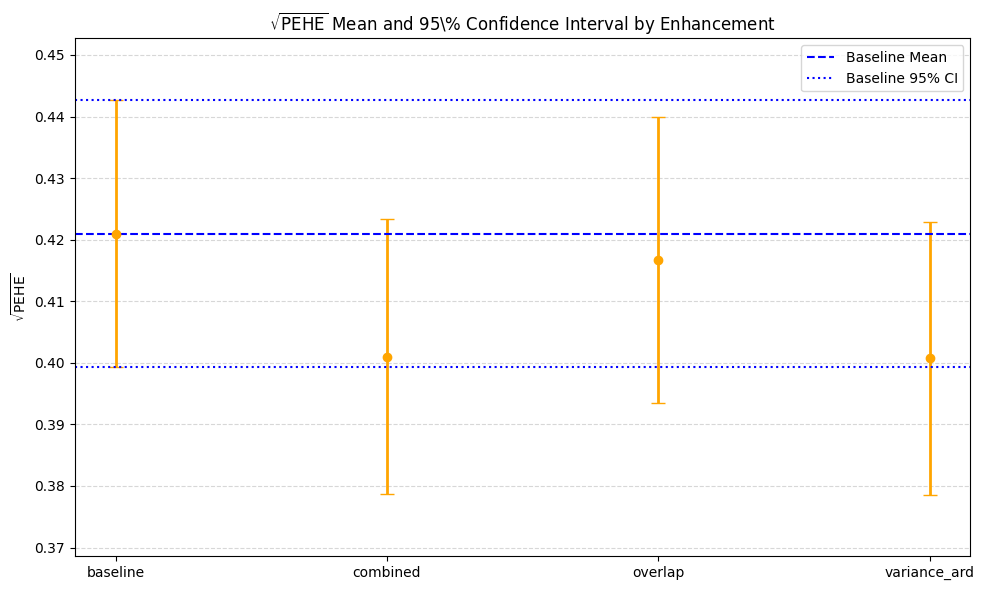

In [7]:
evaluate_ihdp_configs()